In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from IPython.display import clear_output
from sklearn.metrics import classification_report

In [2]:
# import data

# load images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# vectorize all of the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# convert to black/white
x_train_int = np.array([np.round(image/256) for image in x_train])
x_test_int = np.array([np.round(image/256) for image in x_test])

In [3]:
# functions for doing k-means on MNIST images

def init_random_centroids(data, k):
    """
    Initialize k random centroids from the given data
    """
    indeces = np.random.choice(data.shape[0], k)
    
    return data[indeces,:]


def init_selected_centroids(data, labels, choices):
    """
    Initialize random centroids from each class (0 thru 9)
    Choices should say how many centroids should be chosen from each class
    """
    assert len(choices) == 10
    
    centroids = []
    
    for y in range(10):
        subset = data[labels == y]
        num = choices[y]
        indeces = []
        for i in range(num):
            index = np.random.choice(subset.shape[0], 1)
            while index in indeces:
                index = np.random.choice(subset.shape[0], 1)
            centroids.append(subset[index,:])
            indeces.append(index)
    
    return np.array(centroids).reshape(len(centroids), 784)

def assign_clusters(data, centroids):
    """
    assign every point in the given data to a centroid
    """
    closest_centroids = []
    for image in data:
        closest = np.argmin([np.linalg.norm(image-centroid) for centroid in centroids])
        closest_centroids.append(closest)

    return np.array(closest_centroids)


def calc_centroid(cluster):
    """
    Calculate the average of all images in the given cluster
    The cluster should be an array of images, with each image in a row
    """
    return np.mean(cluster, axis=0)


def k_means_mnist(data, k, max_iters=10, init_method='random', choices=None, labels=None):
    """
    Apply the given helper functions to find the k centroids
    """
    # initialize the centroids
    if init_method == 'random':
        centroids = init_random_centroids(data, k)
    elif init_method == 'selected':
        assert np.sum(choices) == k
        centroids = init_selected_centroids(data, labels, choices)
    
    # iteratively move the centroids
    for it in range(max_iters):
           
        new_centroids = np.empty([k,784])

        for i in range(k):
            print('Currently on centroid', i+1, 'of', k, 'and iteration', it+1, 'out of', max_iters)
            closest = assign_clusters(data, centroids)
            
            cluster = data[closest==i]
            
            new_centroids[i] = calc_centroid(cluster)
            
            clear_output()

        centroids = new_centroids
    
    return centroids


def classify(x, centroids, labels):
    """
    Classify each image in an n x 784 array of MNIST images
    """
    yhat = []
    for image in x:
        index = np.argmin(([np.linalg.norm(image - centroid) for centroid in centroids]))
        yhat.append(labels[index])
    return np.array(yhat)

# 10 random clusters

In [4]:
# get centroids
centroids = k_means_mnist(x_train, 10)

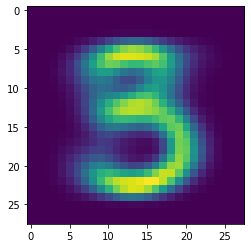

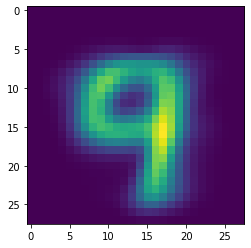

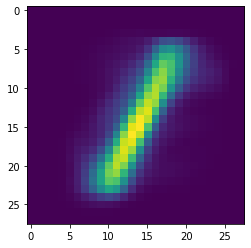

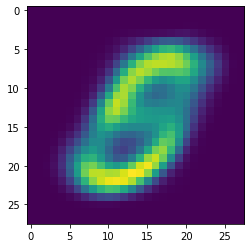

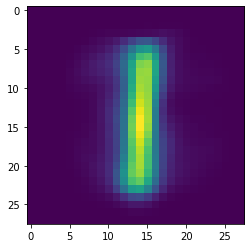

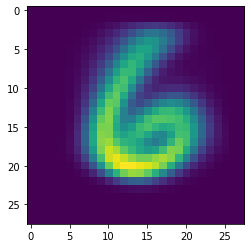

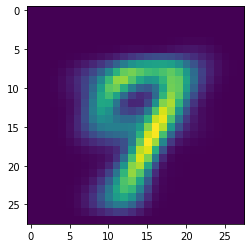

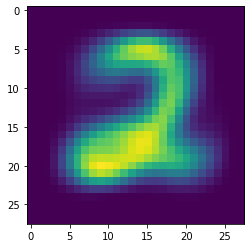

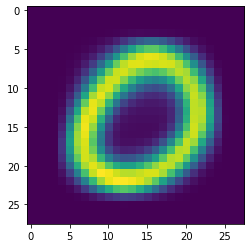

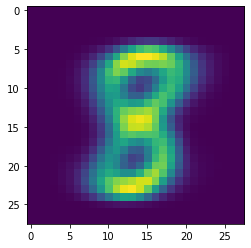

In [5]:
# display the centroids
for i in range(len(centroids)):
    plt.imshow(centroids[i].reshape(28,28))
    plt.show()

In [7]:
# label the clusters by hand
labels = [3,9,1,5,1,6,9,2,0,8]
assert len(labels) == len(centroids)


# calculate error rates for training and testing
x = x_train
y = y_train
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

x = x_test
y = y_test
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      5923
           1       0.59      0.99      0.74      6742
           2       0.91      0.70      0.79      5958
           3       0.54      0.52      0.53      6131
           4       0.00      0.00      0.00      5842
           5       0.31      0.30      0.31      5421
           6       0.87      0.80      0.84      5918
           7       0.00      0.00      0.00      6265
           8       0.55      0.55      0.55      5851
           9       0.30      0.89      0.45      5949

    accuracy                           0.55     60000
   macro avg       0.50      0.54      0.50     60000
weighted avg       0.50      0.55      0.50     60000

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       980
           1       0.63      0.99      0.77      1135
           2       0.90      0.67      0.77      1032
           3       0.55 

# 20 random clusters

In [8]:
# get centroids
centroids = k_means_mnist(x_train, 20)

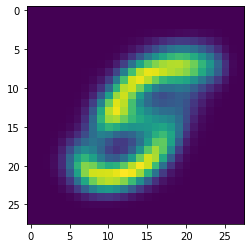

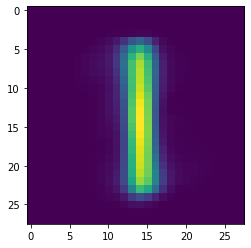

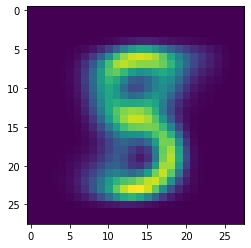

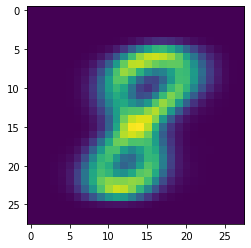

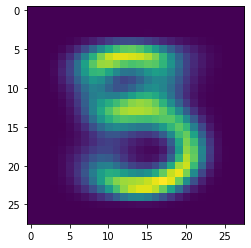

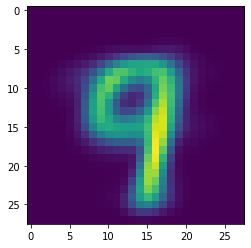

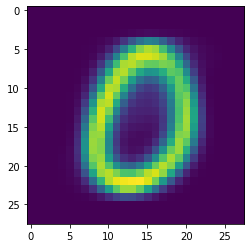

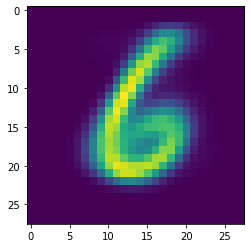

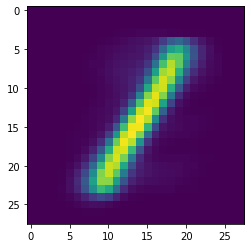

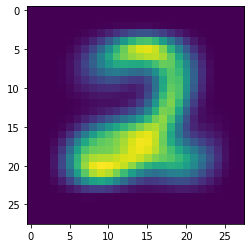

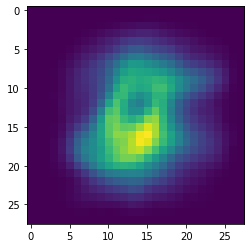

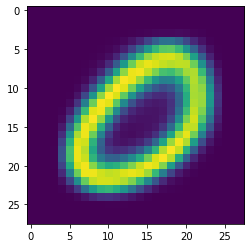

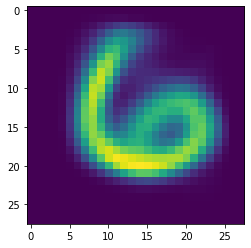

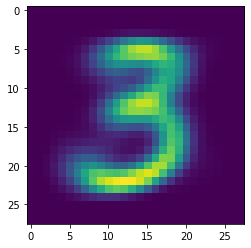

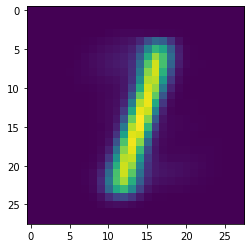

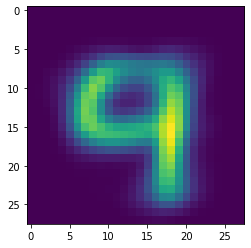

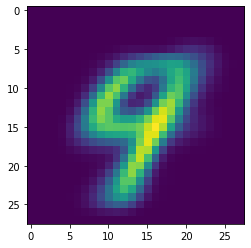

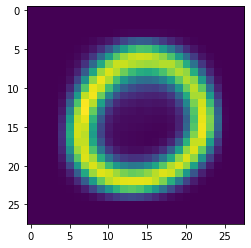

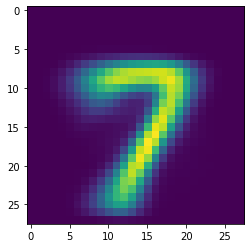

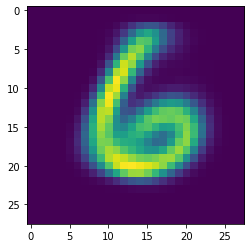

In [9]:
# display the centroids
for i in range(len(centroids)):
    plt.imshow(centroids[i].reshape(28,28))
    plt.show()

In [10]:
# label the clusters by hand
labels = [5,1,3,8,3,9,0,6,1,2,0,0,6,3,1,9,9,0,7,6]
assert len(labels) == len(centroids)


# calculate error rates for training and testing
x = x_train
y = y_train
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

x = x_test
y = y_test
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.57      0.88      0.69      5923
           1       0.80      0.98      0.89      6742
           2       0.96      0.63      0.76      5958
           3       0.49      0.83      0.61      6131
           4       0.00      0.00      0.00      5842
           5       0.60      0.28      0.38      5421
           6       0.89      0.89      0.89      5918
           7       0.90      0.57      0.70      6265
           8       0.81      0.47      0.60      5851
           9       0.41      0.85      0.55      5949

    accuracy                           0.65     60000
   macro avg       0.64      0.64      0.61     60000
weighted avg       0.65      0.65      0.61     60000

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       980
           1       0.81      0.99      0.89      1135
           2       0.96      0.61      0.75      1032
           3       0.47 

# 10 clusters, with one chosen from each class

In [11]:
choices = np.array([
    1, # 1 zero
    1, # 1 one
    1, # 1 two
    1, # 1 three
    1, # 1 four
    1, # 1 five
    1, # 1 six
    1, # 1 seven
    1, # 1 eight
    1, # 1 nine
])
assert np.sum(choices) == 10
centroids = k_means_mnist(x_train, 10, init_method='selected', choices=choices, labels=y_train)

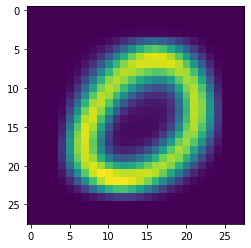

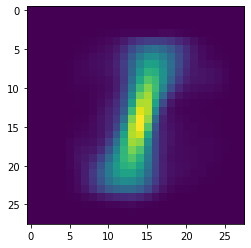

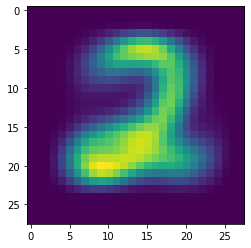

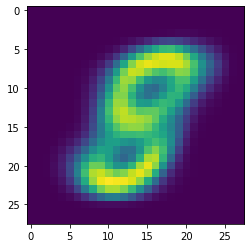

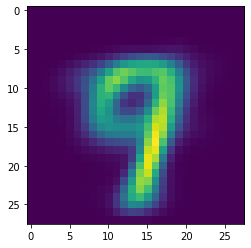

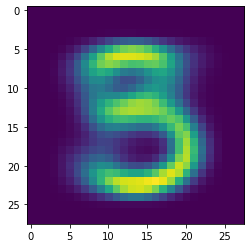

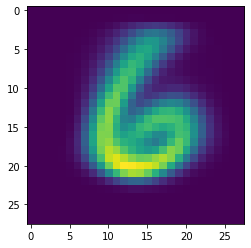

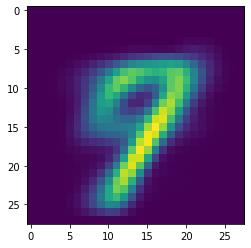

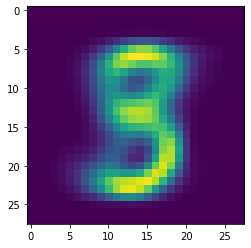

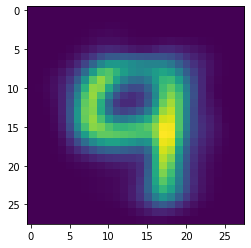

In [12]:
# display the centroids
for i in range(len(centroids)):
    plt.imshow(centroids[i].reshape(28,28))
    plt.show()

In [13]:
# label the clusters by hand
labels = [0,1,2,8,9,3,6,9,3,4]
assert len(labels) == len(centroids)


# calculate error rates for training and testing
x = x_train
y = y_train
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

x = x_test
y = y_test
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      5923
           1       0.67      0.97      0.79      6742
           2       0.90      0.71      0.79      5958
           3       0.44      0.77      0.56      6131
           4       0.42      0.39      0.41      5842
           5       0.00      0.00      0.00      5421
           6       0.87      0.81      0.84      5918
           7       0.00      0.00      0.00      6265
           8       0.41      0.41      0.41      5851
           9       0.30      0.66      0.41      5949

    accuracy                           0.56     60000
   macro avg       0.50      0.55      0.51     60000
weighted avg       0.50      0.56      0.51     60000

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       980
           1       0.71      0.97      0.82      1135
           2       0.89      0.70      0.78      1032
           3       0.43 

## 20 clusters, with various numbers chosen from each class

In [15]:
choices = np.array([
    1, # 1 zero
    1, # 1 one
    1, # 1 two
    1, # 1 three
    2, # 1 four
    3, # 1 five
    3, # 1 six
    3, # 1 seven
    4, # 1 eight
    1, # 1 nine
])
assert np.sum(choices) == 20
centroids = k_means_mnist(x_train, 20, init_method='selected', choices=choices, labels=y_train)

In [ ]:
# display the centroids
for i in range(len(centroids)):
    plt.imshow(centroids[i].reshape(28,28))
    plt.show()

In [174]:
# label the clusters by hand
labels = [0,]
assert len(labels) == len(centroids)


# calculate error rates for training and testing
x = x_train
y = y_train
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

x = x_test
y = y_test
yhat = classify(x, centroids, labels)
assert len(yhat) == len(y)
print(classification_report(y, yhat))

Error rate = 0.2994
